# Emotion recognition using NLP: Affective Computing 2023

Danila Goncharenko, 2303788

Ana Ferreira, 2308587

Luca Hustiuc, 2209104

In [1]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk import word_tokenize

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

# feature extraction / vectorization
from sklearn.feature_extraction.text import TfidfVectorizer # , CountVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression #, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# save and load a file
import pickle

In [2]:
df = pd.read_pickle('clean_data.pkl')

## 1. Import Dataset


In [3]:
from sklearn.model_selection import train_test_split

# Define the class names
class_names = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise', 'neutral']

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# # Initialize empty DataFrames to store the train and test data
# df_train = pd.DataFrame(columns=['text', 'emotions'])
# df_test = pd.DataFrame(columns=['text', 'emotions'])

# # Iterate over each class to split the data
# for emotion in class_names:
#     # Filter the data for the current class
#     class_data = df[df['emotions'] == emotion]
    
#     # Split the data into train and test for the current class
#     class_train, class_test = train_test_split(class_data, test_size=0.3, random_state=42)
    
#     # Take only 14,971 samples for the training set
#     class_train = class_train.head(15000)
    
#     # Append the split data to the overall train and test DataFrames
#     df_train = pd.concat([df_train, class_train])
#     df_test = pd.concat([df_test, class_test])

# Shuffle the training and validation data
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features (X) and labels (y) for both sets
X_train = df_train['text']
X_test = df_test['text']
y_train = df_train['emotions']
y_test = df_test['emotions']

# Print the size of the training and validation sets
print('Size of the training set: %s' % len(X_train))
print('Size of the validation set: %s' % len(X_test))

data = pd.concat([df_train, df_test])
print(data.emotions.value_counts())

data.head()

Size of the training set: 33600
Size of the validation set: 8400
emotions
love        6000
sadness     6000
surprise    6000
fear        6000
neutral     6000
joy         6000
anger       6000
Name: count, dtype: int64


,text,emotions
0,i am doing some tutoring and some other freela...,love
1,i feel guilt on remembering how i ignored blac...,sadness
2,i was feeling ungrateful and unhappy,sadness
3,ive ever seen and i could feel the music im st...,surprise
4,i left the house feeling like i missed the mar...,sadness


In [4]:
print("Train", df_train.emotions.value_counts())
print("Test", df_test.emotions.value_counts())

Train emotions
surprise    4843
anger       4834
fear        4810
love        4793
neutral     4789
joy         4785
sadness     4746
Name: count, dtype: int64
Test emotions
sadness     1254
joy         1215
neutral     1211
love        1207
fear        1190
anger       1166
surprise    1157
Name: count, dtype: int64


### Plotting confusion matrix for later evaluation 

In [13]:
def plot_confusion_matrix(y_predicted, the_title="Normalized Confusion Matrix"):
    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_predicted) * 100))
    print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_predicted, average='micro') * 100))
    print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_predicted))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_predicted)

    # Normalize the confusion matrix
    conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Create a figure and axis
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size for better visualization
    sns.heatmap(conf_matrix, annot=True, cmap="Blues",
                xticklabels=class_names, yticklabels=class_names, fmt=".2%")

    # Add labels and a title
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(the_title)

## 2. Text Preprocessing

In [6]:
def preprocess_and_tokenize(data):    
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    tokenized = word_tokenize(data)
        
    return tokenized

## 3. Text Representation

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.text)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

# 6m 5.6s

# 47.9s balanced

C:\Users\Dan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## 4. Classifiers

###  Naive Bayes

In [9]:
nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

ynb_pred = nb.predict(X_test_vect)

# plot_confusion_matrix(y_test, ynb_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
# plt.show()

Accuracy: 76.35%

F1 Score: 76.35

COnfusion Matrix:
 [[ 669  117   19  113  123   24  101]
 [   9 1008    4   39    0    9  121]
 [  13   74  667  237   86   20  118]
 [   3   10   15 1152    0    3   24]
 [  43   13   30   16 1069   12   28]
 [  41  132   13  105   96  759  108]
 [   1   46    6   15    0    0 1089]]


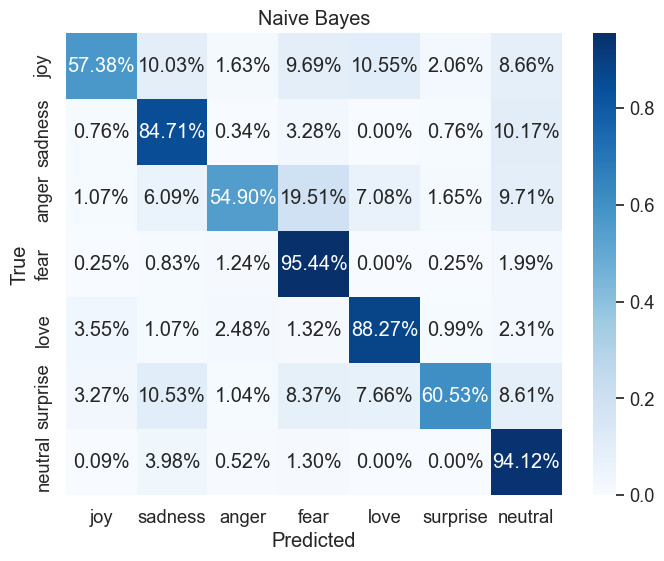

In [14]:

plot_confusion_matrix(ynb_pred, the_title="Naive Bayes")
# Show the plot
plt.show()

###  Random Forrest

In [19]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_vect, y_train)

yrf_pred = rf.predict(X_test_vect)

# 1 estimator = 19.2 s

# 10 estimators = 3m 13.9s

Accuracy: 67.69%

F1 Score: 67.69

COnfusion Matrix:
 [[813  80  78  35  87  70  24]
 [ 77 874  75  23   0  58 104]
 [125 105 673 138  49  88  40]
 [ 52  45 180 888   0  35  20]
 [  4   1   2   0 317   0   1]
 [145 113 189  61  62 585  24]
 [ 35  88  60  27   0  30 942]]


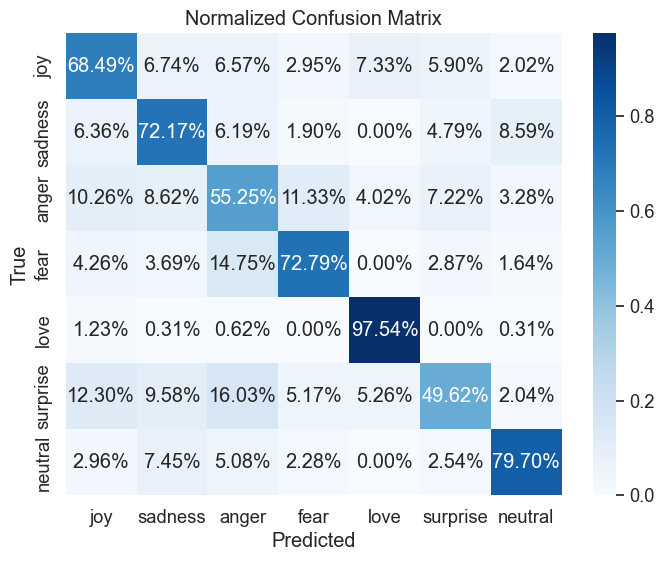

In [20]:
plot_confusion_matrix(yrf_pred, the_title="Random Forrest")

# Show the plot
plt.show()

###  Logistic Regression

In [11]:
log = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
log.fit(X_train_vect, y_train)

ylog_pred = log.predict(X_test_vect)

#3m 28.6s

Accuracy: 84.96%

F1 Score: 84.96

COnfusion Matrix:
 [[ 861   40   37   22  180   23    3]
 [  28  990   13   18    4   26  111]
 [  26   19  890  113  126   27   14]
 [  10    3   24 1155    0    9    6]
 [  22    0    2    0 1187    0    0]
 [  52   37   41   22  147  943   12]
 [   3   27   12    4    0    0 1111]]


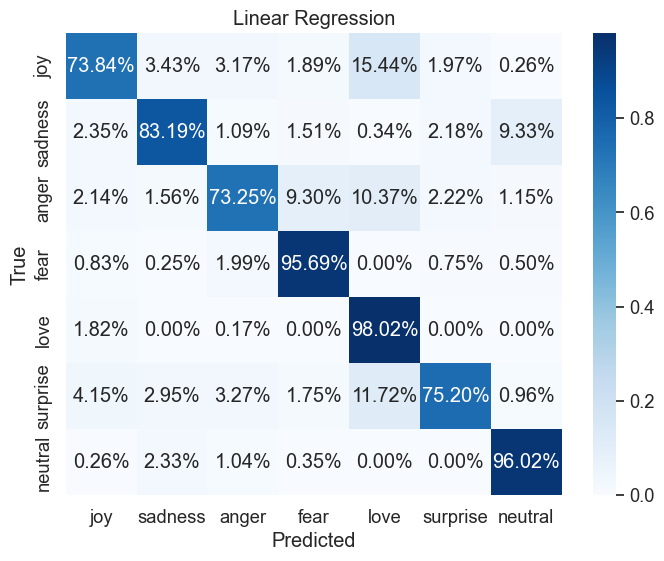

In [15]:
plot_confusion_matrix(ylog_pred, the_title="Linear Regression")

# Show the plot
plt.show()

###  Linear Support Vector

In [17]:
svc = LinearSVC(tol=1e-05)
svc.fit(X_train_vect, y_train)

ysvm_pred = svc.predict(X_test_vect)

Accuracy: 88.08%

F1 Score: 88.08

COnfusion Matrix:
 [[ 945   39   17   12  121   27    5]
 [  18 1021   11   10    3   16  111]
 [  21   15  952  105   85   24   13]
 [   6    2   29 1160    0    6    4]
 [  21    1    4    0 1184    1    0]
 [  59   37   14   13  106 1016    9]
 [   2   28    3    1    0    2 1121]]


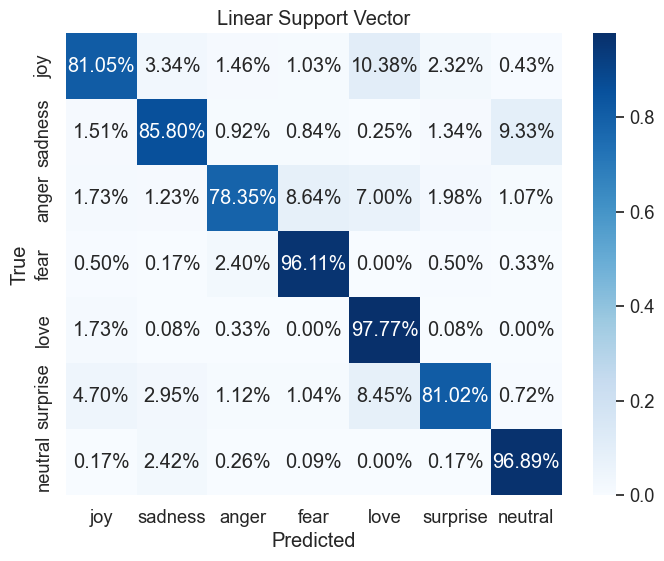

In [18]:
plot_confusion_matrix(ysvm_pred, the_title="Linear Support Vector")

# Show the plot
plt.show()

## 4. Saving the tf-idf + SVM Model 


In [25]:
#Create pipeline with our tf-idf vectorizer and LinearSVC model
svm_model = Pipeline([
    ('tfidf', vect),
    ('clf', svc),
])

In [26]:
# save the model
filename = 'models/new_tfidf_svm.sav'
pickle.dump(svm_model, open(filename, 'wb'))

In [27]:
model = pickle.load(open(filename, 'rb'))

message = 'delivery was hour late and my pizza is cold!' 
model.predict([message])

array(['anger'], dtype=object)

In [28]:
message = 'I am shocked!' 
model.predict([message])

array(['surprise'], dtype=object)

In [41]:
message = 'You are so sweet!' 
model.predict([message])

array(['love'], dtype=object)

In [48]:
message = 'He has a depression.' 
model.predict([message])

array(['sadness'], dtype=object)

In [31]:
message = 'Today is my lucky day!' 
model.predict([message])

array(['joy'], dtype=object)

In [32]:
message = 'I feel really scared' 
model.predict([message])

array(['fear'], dtype=object)

In [40]:
message = 'house on the hill' 
model.predict([message])

array(['neutral'], dtype=object)

The dataset is quite small, so it may not know certain words. In additional 'fear' sentences are bias to a certain sentence structure: "I *verb* *something*". This results in overfitting and thus poor generalization of the model.

Here's an example of misclassification:

In [50]:
fear_example = df[df['emotions'] == 'fear'].tail(10)

fear_example

,text,emotions
52977,i feel a strange kinship with the sky united a...,fear
52988,i was kindof like in a daze lying there feelin...,fear
53008,i guess feeling fearful and guilty is his way ...,fear
53027,i am very at home in california there is alway...,fear
53063,i got on the plane with my hot chocolate feeli...,fear
53068,i started to feel apprehensive when the driver...,fear
53089,i feel even more unsure than i was the first t...,fear
53091,i woke up yesterday morning feeling skeptical ...,fear
53098,i even feeling insecure,fear
53099,i remember making it to food basics and sudden...,fear


In [51]:
message = 'This house is spooky!' 
model.predict([message])

array(['neutral'], dtype=object)